# Assignment 5, Question 5: Missing Data Analysis

**Points: 15**

Apply and compare different missing data strategies on the clinical trial dataset.

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import utilities from Q3
from q3_data_utils import load_data, detect_missing, fill_missing, clean_data


# Load the data
df = clean_data(load_data('data/clinical_trial_raw.csv'))
print(f"Loaded {len(df)} patients")

# Prewritten visualization function for missing data
def visualize_missing_data(missing_counts):
    """
    Create a bar chart of missing values by column.
    
    Args:
        missing_counts: pandas Series with missing value counts per column
    """
    plt.figure(figsize=(10, 6))
    missing_counts.plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.xticks(rotation=45)
    plt.ylabel('Number of Missing Values')
    plt.tight_layout()
    plt.show()



Loaded 10000 patients


## Part 1: Detect Missing Data (3 points)

1. Use the `detect_missing()` utility to find missing values
2. Visualize missing data with a bar plot
3. Calculate the percentage of missing values per column

patient_id               0
age                    200
sex                      0
bmi                    438
enrollment_date          0
systolic_bp            414
diastolic_bp           414
cholesterol_total      554
cholesterol_hdl        554
cholesterol_ldl        554
glucose_fasting        369
site                     0
intervention_group       0
follow_up_months         0
adverse_events           0
outcome_cvd              0
adherence_pct         1467
dropout                  0
dtype: int64
patient_id             0.00
age                    2.00
sex                    0.00
bmi                    4.38
enrollment_date        0.00
systolic_bp            4.14
diastolic_bp           4.14
cholesterol_total      5.54
cholesterol_hdl        5.54
cholesterol_ldl        5.54
glucose_fasting        3.69
site                   0.00
intervention_group     0.00
follow_up_months       0.00
adverse_events         0.00
outcome_cvd            0.00
adherence_pct         14.67
dropout                0.

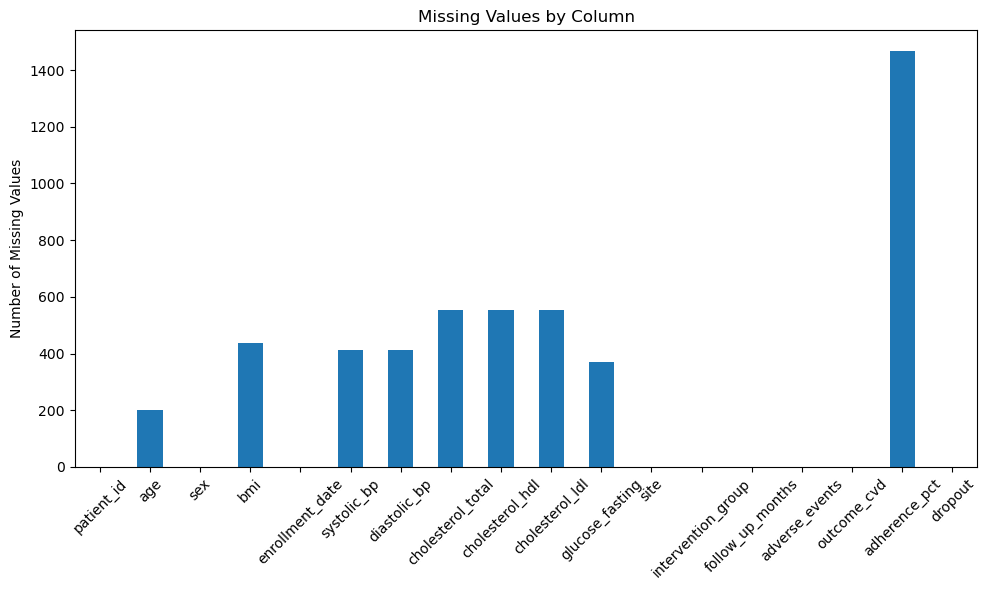

In [2]:
# TODO: Detect and analyze missing data
# 1. Use detect_missing(df) to get missing value counts
missing_counts = detect_missing(df)
# 2. Calculate percentage of missing values per column 
missing_percentage = (missing_counts/len(df))*100
# 3. Print both counts and percentages
print(missing_counts)
print(missing_percentage)
# 4. Identify which columns have missing data
# Optional: Use the visualization function above to create a bar chart
visualize_missing_data(missing_counts)


## Part 2: Compare Imputation Strategies (6 points)

For the 'cholesterol_total' column (which has missing values):

1. Fill with mean using `fill_missing()` utility
2. Fill with median using `fill_missing()` utility  
3. Forward fill using pandas `.fillna(method='ffill')`
4. Compare the three strategies - create a summary table showing:
   - Original mean/median
   - Mean/median after each strategy
   - How many values were filled

In [3]:
# TODO: Compare imputation strategies
mean_fill = fill_missing(df, 'cholesterol_total', strategy='mean')
median_fill = fill_missing(df, 'cholesterol_total', strategy='median')
nafill = df.fillna(method='ffill')
print(detect_missing(median_fill))
summary = f'Original Mean: {df['cholesterol_total'].mean()} Median: {df['cholesterol_total'].median()}\n Strategy 1# Mean: {mean_fill['cholesterol_total'].mean()} Median: {mean_fill['cholesterol_total'].median()}\n Strategy 2# Mean: {median_fill['cholesterol_total'].mean()} Median: {median_fill['cholesterol_total'].median()}\n Strategy 3# Mean: {nafill['cholesterol_total'].mean()} Median: {nafill['cholesterol_total'].median()}\n Values Filled: 554'
print(summary)

patient_id               0
age                    200
sex                      0
bmi                    438
enrollment_date          0
systolic_bp            414
diastolic_bp           414
cholesterol_total        0
cholesterol_hdl        554
cholesterol_ldl        554
glucose_fasting        369
site                     0
intervention_group       0
follow_up_months         0
adverse_events           0
outcome_cvd              0
adherence_pct         1467
dropout                  0
dtype: int64
Original Mean: 178.0394876138048 Median: 177.0
 Strategy 1# Mean: 178.03948761380477 Median: 178.0394876138048
 Strategy 2# Mean: 177.9819 Median: 177.0
 Strategy 3# Mean: 178.0705 Median: 177.0
 Values Filled: 554


/var/folders/xf/qfyxwpds1l75t78knjlzq1z00000gn/T/ipykernel_61061/2095814938.py:4: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  nafill = df.fillna(method='ffill')


## Part 3: Dropping Missing Data (3 points)

1. Drop rows where ANY column has missing data - how many rows remain?
2. Drop rows where specific columns have missing data (e.g., only 'age' or 'bmi')
3. Which approach loses less data?

In [4]:
# TODO: Drop missing rows with different strategies
drop_data = df.dropna()
print(drop_data.shape)
drop_bmi = df['bmi'].dropna()
print(drop_bmi.shape)

(6980, 18)
(9562,)


## Part 4: Create Clean Dataset (3 points)

Apply your chosen strategy to create a clean dataset:
1. Choose appropriate imputation for numeric columns
2. Drop rows with missing critical values (e.g., patient_id, age)
3. Save to `output/q5_cleaned_data.csv`
4. Save a missing data report to `output/q5_missing_report.txt`

In [5]:
# TODO: Create and save clean dataset
df_small = df.dropna()
df_small.to_csv('output/q5_cleaned_data.csv')
report = f'Dimentions: {df.shape}\nMissing Data:\n{detect_missing(df)}\n'
with open('output/q5_missing_report.txt', 'w') as file:
     file.write(f'{report}')     


## Reflection

Which imputation strategy would you recommend for this dataset and why?

**Your answer:**

TODO: Explain your strategy choice

Its the most simple strategy if you dont know which columns are numeric 
